<h1> Выявление закономерностей, определяющих успешность продуктов интернет-магазина компьютерных игр "Стримчик" <h1>

**Цель исследования:** выявить определяющие успешность игры закономерности, которые позволят сделать ставку на потенциально популярный продукт и спланировать рекламные кампании интернет-магазина компьютерных игр «Стримчик» на 2017 год (по данным до 2016 года)

**План исследования:**
* Посмотреть сколько игр выпускалось в разные годы
* Посмотреть как менялись продажи по платформам, выявить жизненный цикл платформы
* Выбрать акутальный период для дальнейшего исследования
* Выбрать несколько потенциально прибыльных платформ
* Построить график «ящик с усами» по глобальным продажам игр в разбивке по платформам
* Посмотреть как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков
* Соотнести выводы с продажами игр на других платформах
* Посмотреть на общее распределение игр по жанрам
* Составить портрет пользователя каждого региона
* Проверить гипотезы: 

Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;

Средние пользовательские рейтинги жанров Action и Sports разные.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st

In [3]:
data = pd.read_csv('/datasets/games.csv')

In [4]:
data.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


## Подготовка данных

Приведем названия столбцов к нижнему регистру:

In [6]:
data.columns = data.columns.str.lower()

In [7]:
data.head(2)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN


Изменим типы данных с столбцах:

In [8]:
data['year_of_release'] = data['year_of_release'].astype('Int64')

Обработка пропусков:

In [9]:
data.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

В столбце year_of_release 269 пропусков, name 2, genre 2, заполнить которые точными данными практически невозможно, поэтому избавляемся от этих строк, так как их количество незначительное

In [10]:
data = data.dropna(subset=['year_of_release'])
data = data.dropna(subset=['name'])
data = data.dropna(subset=['genre'])

Значение tbd не удалось заполнить, поэтому заменим на NaN, а затем все пропуски заменим маркером

In [11]:
len(data.query('user_score == "tbd"'))
data['user_score'] = data['user_score'].replace('tbd', np.NaN)
data['user_score'] = data['user_score'].astype('float64')

In [12]:
data['user_score'] = data['user_score'].fillna(-1)
data['critic_score'] = data['critic_score'].fillna(-1)

Пропуски в rating заполним unknown 

In [13]:
data['rating'] = data['rating'].fillna('unknown')

**В столбцах critic_score, user_score, rating присутствует огромное количество пропусков, которые мы заполнили маркером. Их сложно чем-то заполнить, не ухудшив качество данных, а удаление приведет к потере большого количества данных. Возможно, пропуски связаны с тем, что ESRB - это рейтинг для США и Канады, а мы исследуем игры не только для этих стран. Пропуски в name, year_of_release, genre удалили, так как они составляют незначительную долю от выборки**

Проверим, присутствуют ли явные дубликаты:

In [14]:
data.duplicated().sum()

0

Неявные дубликаты:

In [15]:
data['genre'].unique()

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy'], dtype=object)

In [16]:
data['platform'].unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       'PS4', '3DS', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne',
       'WiiU', 'GC', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

In [17]:
data['name'].unique()

array(['Wii Sports', 'Super Mario Bros.', 'Mario Kart Wii', ...,
       'Woody Woodpecker in Crazy Castle 5', 'LMA Manager 2007',
       'Haitaka no Psychedelica'], dtype=object)

In [18]:
data['rating'].unique()

array(['E', 'unknown', 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'],
      dtype=object)

«E» («Everyone») — «Для всех» 

«M» («Mature») — «Для взрослых»: Материалы игры не подходят для лиц младше 17 лет

«T» («Teen») — «Подросткам»: Игра подходит для лиц от 13 лет

«E10+» («Everyone 10 and older») — «Для всех от 10 лет и старше»

«K-A» - для детей и взрослых (переименован в E)

«AO» («Adults Only 18+») — «Только для взрослых»

«EC» («Early childhood») — «Для детей младшего возраста»: Игра подходит для детей от 3 лет 

«RP» («Rating Pending») — «Рейтинг ожидается»: Продукт был отправлен в ESRB и ожидает присвоения рейтинга

In [19]:
#Заменим K-A на E
data.loc[data['rating'] == 'K-A', 'rating'] = 'E'

**Дубликаты отсутствуют**

Посчитаем суммарные продажи во всех регионах и создадим отдельный столбец:

In [20]:
data['sum_sales'] = data[['na_sales','eu_sales','jp_sales', 'other_sales']].sum(axis = 1)

In [21]:
# Комментарий ревьюера
# Посмотрим, что у нас осталось
temp = data.copy() 
list_c = ['name', 'platform', 'year_of_release', 'genre', 'critic_score', 'user_score', 'rating']
print(temp.info())
for col_l in list_c:
  print('-'* 25)
  print(col_l, temp[col_l].sort_values().unique())
  print(col_l,': кол-во NaN',temp[col_l].isna().sum(),
        ', процент NaN', round(temp[col_l].isna().sum()/len(temp)*100, 2),'%')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  Int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     16444 non-null  float64
 9   user_score       16444 non-null  float64
 10  rating           16444 non-null  object 
 11  sum_sales        16444 non-null  float64
dtypes: Int64(1), float64(7), object(4)
memory usage: 1.6+ MB
None
-------------------------
name [' Beyblade Burst' ' Fire Emblem Fates' " Frozen: Olaf's Quest" ...
 'uDraw Studio' 'uDraw Studio: Instant Artist'
 '¡Shin Chan Flipa en colores!']
n

## Исследовательский анализ данных

[Text(0.5, 0, 'Год релиза'), Text(0, 0.5, 'Количество')]

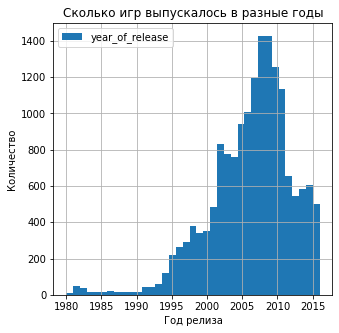

In [22]:
data.plot(y='year_of_release', kind='hist', grid=True, figsize=(5,5), bins=37, title='Сколько игр выпускалось в разные годы').set(xlabel='Год релиза', ylabel='Количество')

**На графике видно, что наибольшее количество выпущенных игр приходится на 2007-2008 годы, затем наблюдался резкий спад. Скорее всего, это обусловлено финансовым кризисом 2008 года, который притормозил бурный рост игровой индустрии. Данные за все периоды нам не важны, так как игровая отрасль, да и в целом современные технологии развиваются очень быстро и, чтобы делать какие-либо прогнозы, необходимо оперировать наиболее актуальными данными, которые приближены к нынешней реальности**

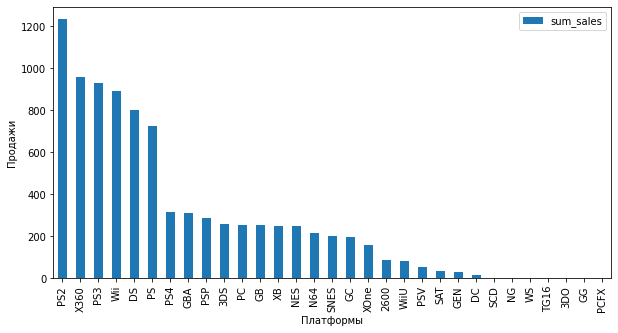

In [24]:
(data.groupby('platform', as_index = False)['sum_sales'].sum()
     .sort_values('sum_sales', ascending=False)
     .plot(kind='bar',x='platform', y='sum_sales',figsize=(10, 5))
)
plt.xlabel("Платформы")
plt.ylabel("Продажи")

pass

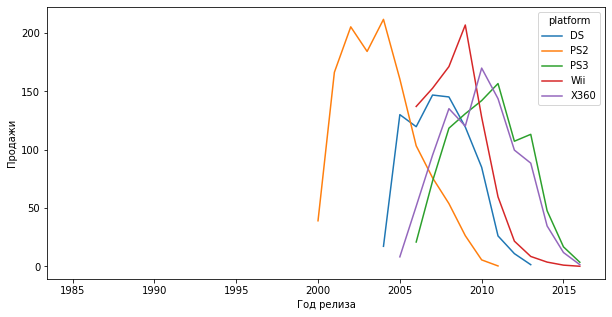

In [25]:
platforms = data.query('platform == "PS2" or platform == "X360" or platform == "PS3" or platform == "Wii" or platform == "DS"')
(platforms
     .pivot_table(index='year_of_release', columns='platform', values='sum_sales', aggfunc='sum')
     .plot(figsize = (10, 5), label=platforms))
plt.xlabel("Год релиза")
plt.ylabel("Продажи")
pass

**По графику можно заметить, что жизненный цикл платформы составляет примерно 10 лет, период активной деятельности - примерно 5 лет. Игровая индустрия, да и в целом мир информационных технологий очень быстро меняется, поэтому в качестве актульного период следует выделить 3 года (2014-2016)**

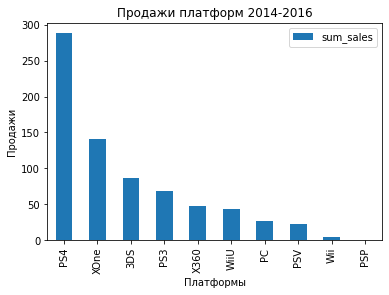

In [26]:
(data
     .query('year_of_release >= 2014')
     .groupby(['platform'], as_index=False)['sum_sales'].sum()
     .sort_values('sum_sales', ascending=False)
     .plot(x='platform', y='sum_sales', kind='bar', title='Продажи платформ 2014-2016')
)
plt.xlabel("Платформы")
plt.ylabel("Продажи")
pass

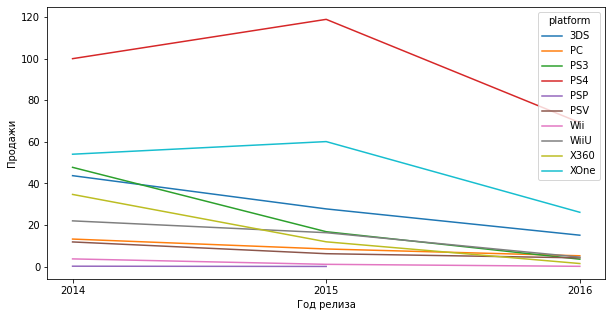

In [27]:
actual_data = data.query('year_of_release >= 2014')
(actual_data
    .pivot_table(index='year_of_release', columns='platform', values='sum_sales', aggfunc='sum')
    .plot(figsize = (10, 5), label=platforms))
plt.xticks(np.arange(2014, 2017, step=1))
plt.xlabel("Год релиза")
plt.ylabel("Продажи")
pass

Можно заметить, что динамика продаж на всех платформах падает. Лидеры продаж по итогам на 2016 год: **PS4, XOne, 3DS**

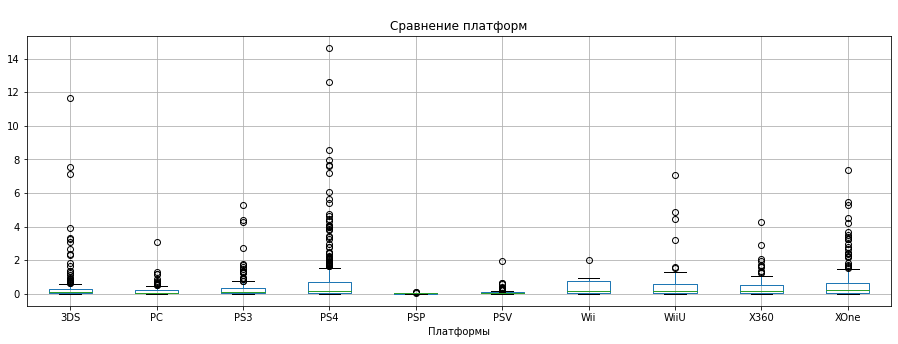

In [28]:
popular_platform = data.query('year_of_release >= 2014')
(popular_platform
     .boxplot(by="platform", column="sum_sales", figsize=(15,5))
)
plt.title('Сравнение платформ')
plt.suptitle(' ')
plt.xlabel("Платформы")
pass

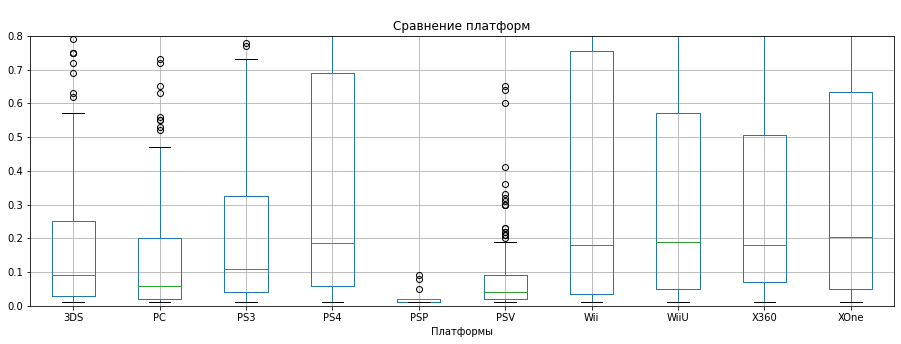

In [29]:
popular_platform = data.query('year_of_release >= 2014')
(popular_platform
     .boxplot(by="platform", column="sum_sales", figsize=(15,5))
)
plt.title('Сравнение платформ')
plt.suptitle(' ')
plt.ylim(0,0.8)
plt.xlabel("Платформы")
pass

**На графике распределения значений видно, что у платформ PS4, XOne и Wii наибольшая медиана, а значит они имеют наиболее устойчивый потребительский спрос, однако у Wii распределение значений глобальных продаж гораздо меньше. PS4 лидирует, отдельные значения даже превышают 12. 3DS имеет более скромные показатели,  поэтому в дальнейшее исследование эту платформу включать не будем.**

Проверим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков

In [30]:
# Комментарий ревьюера 2
data.year_of_release.min()

1980

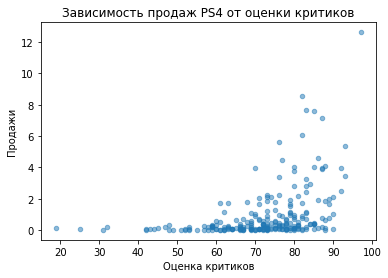

In [31]:
ps4 = data.query('platform == "PS4" and critic_score != -1 and year_of_release >= 2014')
ps4.plot(kind='scatter', x='critic_score', y='sum_sales', alpha=0.5, title='Зависимость продаж PS4 от оценки критиков')
plt.xlabel("Оценка критиков")
plt.ylabel("Продажи")
pass

In [32]:
print('Корреляция продаж и оценки критиков PS4:', ps4['sum_sales'].corr(ps4['critic_score']))

Корреляция продаж и оценки критиков PS4: 0.40266141068104083


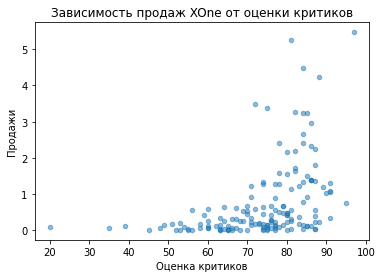

In [33]:
xone = data.query('platform == "XOne" and critic_score != -1 and year_of_release >= 2014')
xone.plot(kind='scatter', x='critic_score', y='sum_sales', alpha=0.5, title='Зависимость продаж XOne от оценки критиков')
plt.xlabel("Оценка критиков")
plt.ylabel("Продажи")
pass

In [34]:
print('Корреляция продаж и оценки критиков XOne:', xone['sum_sales'].corr(xone['critic_score']))

Корреляция продаж и оценки критиков XOne: 0.42867694370333226


**Зависимость между оценками критиков и продажами игр есть, однако она очень маленькая. Скорее всего на такое увеличение продаж влияют какие-то другие факторы**

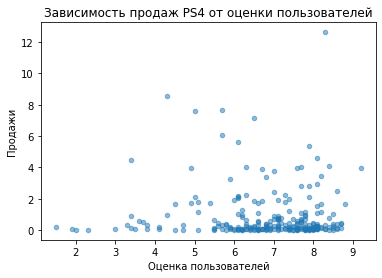

In [35]:
ps4 = data.query('platform == "PS4" and user_score != -1 and year_of_release >= 2014')
ps4.plot(kind='scatter', x='user_score', y='sum_sales', alpha=0.5, title='Зависимость продаж PS4 от оценки пользователей')
plt.xlabel("Оценка пользователей")
plt.ylabel("Продажи")
pass

In [36]:
print('Корреляция продаж и оценки пользователей PS4:', ps4['sum_sales'].corr(ps4['user_score']))

Корреляция продаж и оценки пользователей PS4: -0.040131589472697356


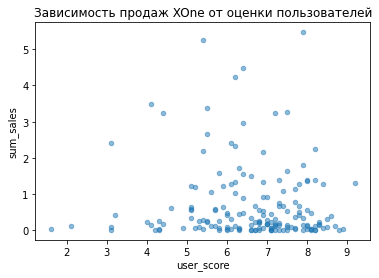

In [37]:
xone = data.query('platform == "XOne" and user_score != -1 and year_of_release >= 2014')
xone.plot(kind='scatter', x='user_score', y='sum_sales', alpha=0.5, title='Зависимость продаж XOne от оценки пользователей')
pass

In [38]:
print('Корреляция продаж и оценки пользователей XOne:', xone['sum_sales'].corr(xone['user_score']))

Корреляция продаж и оценки пользователей XOne: -0.0703839280647581


**Как мы видим, зависимость между оценками пользователей вовсе отсутствует**

Сравним выводы с продажами игр на других платформах:

**Для платформы WiiU:**

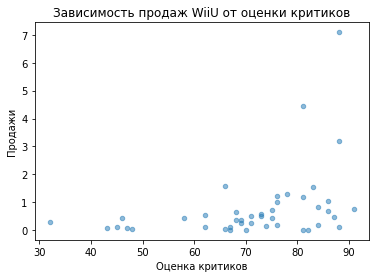

In [39]:
wii = data.query('platform == "WiiU" and critic_score != -1 and year_of_release >= 2014')
wii.plot(kind='scatter', x='critic_score', y='sum_sales', alpha=0.5, title='Зависимость продаж WiiU от оценки критиков')
plt.xlabel("Оценка критиков")
plt.ylabel("Продажи")
pass

In [40]:
print('Корреляция продаж и оценки критиков WiiU:', wii['sum_sales'].corr(wii['critic_score']))

Корреляция продаж и оценки критиков WiiU: 0.370201412480884


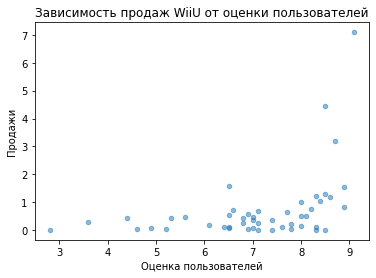

In [41]:
wii = data.query('platform == "WiiU" and user_score != -1 and year_of_release >= 2014')
wii.plot(kind='scatter', x='user_score', y='sum_sales', alpha=0.5, title='Зависимость продаж WiiU от оценки пользователей')
plt.xlabel("Оценка пользователей")
plt.ylabel("Продажи")
pass

In [42]:
print('Корреляция продаж и оценки пользователей WiiU:', wii['sum_sales'].corr(wii['user_score']))

Корреляция продаж и оценки пользователей WiiU: 0.4079264579217078


**Для платформы 3DS:**

Корреляция продаж и оценки критиков 3DS: 0.31411749286905105


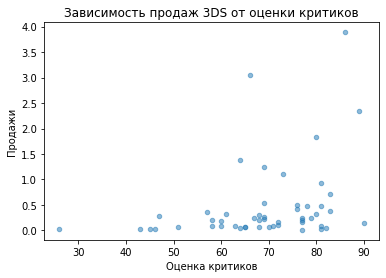

In [43]:
tds = data.query('platform == "3DS" and critic_score != -1 and year_of_release >= 2014')
tds.plot(kind='scatter', x='critic_score', y='sum_sales', alpha=0.5, title='Зависимость продаж 3DS от оценки критиков')
plt.xlabel("Оценка критиков")
plt.ylabel("Продажи")

print('Корреляция продаж и оценки критиков 3DS:', tds['sum_sales'].corr(tds['critic_score']))
pass

Корреляция продаж и оценки пользователей 3DS: 0.2151932718527028


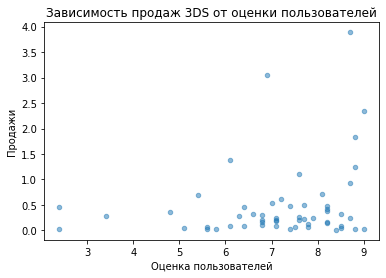

In [44]:
tds = data.query('platform == "3DS" and user_score != -1 and year_of_release >= 2014')
tds.plot(kind='scatter', x='user_score', y='sum_sales', alpha=0.5, title='Зависимость продаж 3DS от оценки пользователей')
plt.xlabel("Оценка пользователей")
plt.ylabel("Продажи")

print('Корреляция продаж и оценки пользователей 3DS:', tds['sum_sales'].corr(tds['user_score']))
pass

**Для платформы PC:**

Корреляция продаж и оценки критиков PC: 0.17463413769350036


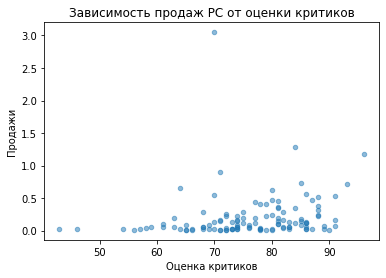

In [45]:
pc = data.query('platform == "PC" and critic_score != -1 and year_of_release >= 2014')
pc.plot(kind='scatter', x='critic_score', y='sum_sales', alpha=0.5, title='Зависимость продаж PC от оценки критиков')
plt.xlabel("Оценка критиков")
plt.ylabel("Продажи")

print('Корреляция продаж и оценки критиков PC:', pc['sum_sales'].corr(pc['critic_score']))
pass

Корреляция продаж и оценки пользователей PC -0.07159665703472452


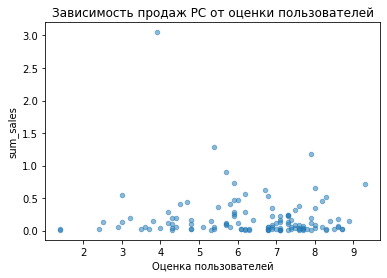

In [46]:
pc = data.query('platform == "PC" and user_score != -1 and year_of_release >= 2014')
pc.plot(kind='scatter', x='user_score', y='sum_sales', alpha=0.5, title='Зависимость продаж PC от оценки пользователей')
plt.xlabel("Оценка пользователей")

print('Корреляция продаж и оценки пользователей PC', pc['sum_sales'].corr(pc['user_score']))
pass

**Для платформы X360:**

Корреляция продаж и оценки критиков X360: 0.5257228356581523


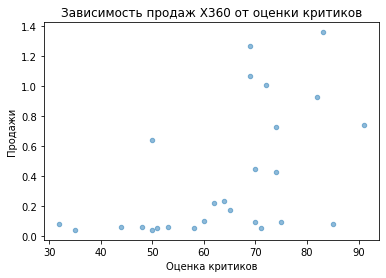

In [47]:
x = data.query('platform == "X360" and critic_score != -1 and year_of_release >= 2014')
x.plot(kind='scatter', x='critic_score', y='sum_sales', alpha=0.5, title='Зависимость продаж X360 от оценки критиков')
plt.xlabel("Оценка критиков")
plt.ylabel("Продажи")

print('Корреляция продаж и оценки критиков X360:', x['sum_sales'].corr(x['critic_score']))
pass

Корреляция продаж и оценки пользователей X360: -0.138444570945665


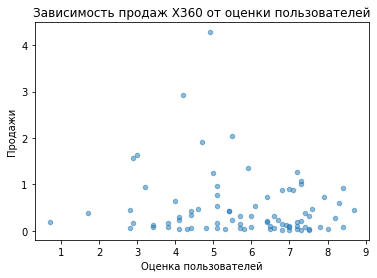

In [48]:
x = data.query('platform == "X360" and user_score != -1 and year_of_release >= 2014')
x.plot(kind='scatter', x='user_score', y='sum_sales', alpha=0.5, title='Зависимость продаж X360 от оценки пользователей')
plt.xlabel("Оценка пользователей")
plt.ylabel("Продажи")

print('Корреляция продаж и оценки пользователей X360:', x['sum_sales'].corr(x['user_score']))
pass

**Для платформы PSV:**

Корреляция продаж и оценки критиков PSV: 0.04266490657009526


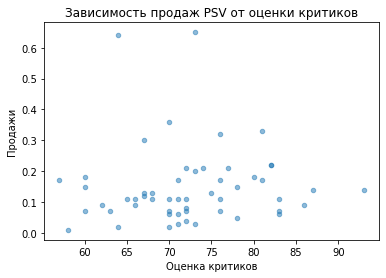

In [49]:
psv = data.query('platform == "PSV" and critic_score != -1 and year_of_release >= 2014')
psv.plot(kind='scatter', x='critic_score', y='sum_sales', alpha=0.5, title='Зависимость продаж PSV от оценки критиков')
plt.xlabel("Оценка критиков")
plt.ylabel("Продажи")

print('Корреляция продаж и оценки критиков PSV:', psv['sum_sales'].corr(psv['critic_score']))
pass

Корреляция продаж и оценки пользователей PSP: -0.16845504978064446


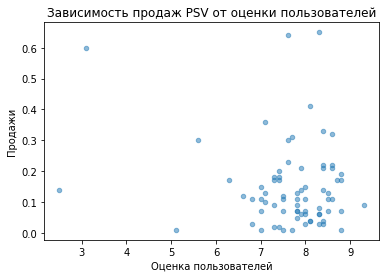

In [50]:
psv = data.query('platform == "PSV" and user_score != -1 and year_of_release >= 2014')
psv.plot(kind='scatter', x='user_score', y='sum_sales', alpha=0.5, title='Зависимость продаж PSV от оценки пользователей')
plt.xlabel("Оценка пользователей")
plt.ylabel("Продажи")

print('Корреляция продаж и оценки пользователей PSP:', psv['sum_sales'].corr(psv['user_score']))
pass

Таким образом, на основе анализа графиков распределения значений и коэффициентов корреляции, выводы об отсутствии зависимости между продажами и оценкой пользователей/критиков внутри каждой платформы за актуальный период подтверждены 

Посмотрим на общее распределение игр по жанрам

<AxesSubplot:title={'center':'Распределение продаж по жанрам'}, xlabel='genre'>

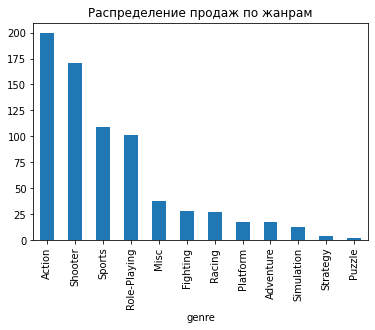

In [52]:
popular_platform = data.query('year_of_release >= 2014')
(popular_platform
     .pivot_table(index='genre', values='sum_sales', aggfunc='sum')
     .sort_values(by='sum_sales', ascending=False)
     .reset_index().plot(kind='bar', x='genre', y='sum_sales', title='Распределение продаж по жанрам', legend=False)
)

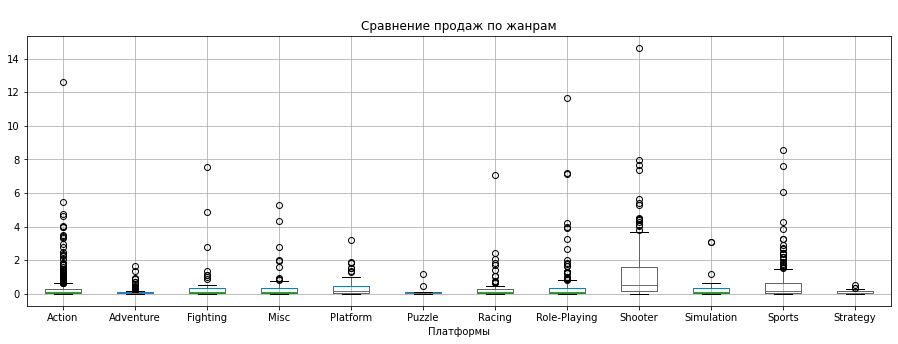

In [54]:
data = data.query('year_of_release >= 2014')
(data
     .boxplot(by="genre", column="sum_sales", figsize=(15,5))
)
plt.title('Сравнение продаж по жанрам')
plt.suptitle(' ')
plt.xlabel("Платформы")
pass

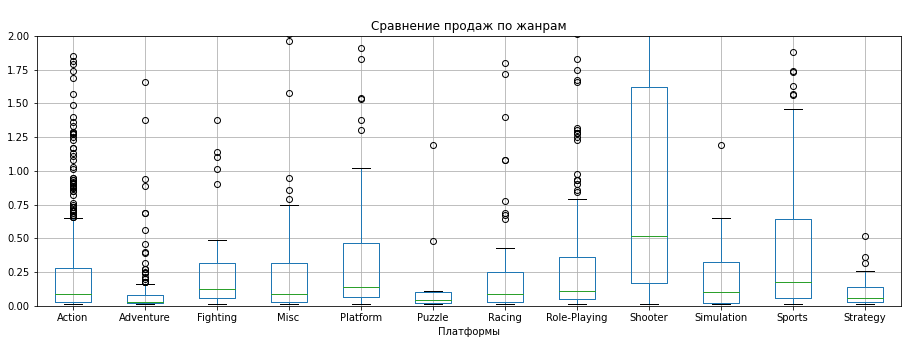

In [55]:
data = data.query('year_of_release >= 2014')
(data
     .boxplot(by="genre", column="sum_sales", figsize=(15,5))
)
plt.title('Сравнение продаж по жанрам')
plt.suptitle(' ')
plt.xlabel("Платформы")
plt.ylim(0,2)
pass

Что касается продаж по жанрам за актуальный период, безусловным лидером стал **shooter**, имеющий наибольшее медианное значение. На втором месте **sports**. В дальнейшем будем ориентироваться на них, как на жанры, имеющие стабильный спрос

 ## Портрет пользователя каждого региона

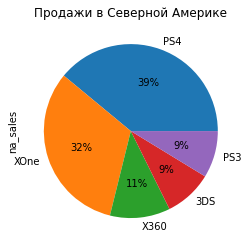

In [56]:
#Построим диаграмму продаж платформ в Северной Америке:
actual_period = data.query('year_of_release >= 2014')
(actual_period
     .pivot_table(index='platform', values='na_sales', aggfunc='sum')
     .sort_values('na_sales', ascending=False).head(5)
     .plot(kind='pie', y='na_sales', autopct='%1.0f%%', legend=False, title='Продажи в Северной Америке')
)
pass

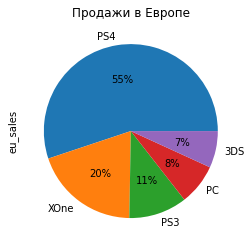

In [57]:
#Построим диаграмму продаж платформ в Европе:
(actual_period
     .pivot_table(index='platform', values='eu_sales', aggfunc='sum')
     .sort_values('eu_sales', ascending=False).head(5)
     .plot(kind='pie', y='eu_sales', autopct='%1.0f%%', legend=False, title='Продажи в Европе')
)
pass

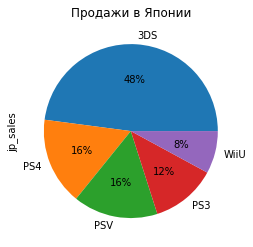

In [58]:
#Построим диаграмму продаж платформ в Японии:
(actual_period
     .pivot_table(index='platform', values='jp_sales', aggfunc='sum')
     .sort_values('jp_sales', ascending=False).head(5)
     .plot(kind='pie', y='jp_sales', autopct='%1.0f%%', legend=False, title='Продажи в Японии')
)
pass

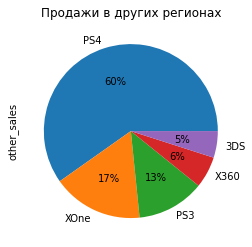

In [59]:
#Построим диаграмму продаж платформ в других регионах:
(actual_period
     .pivot_table(index='platform', values='other_sales', aggfunc='sum')
     .sort_values('other_sales', ascending=False).head(5)
     .plot(kind='pie', y='other_sales', autopct='%1.0f%%', legend=False, title='Продажи в других регионах')
)
pass

**Абсолютным лидером по продажам в Америке, Европе и других регионах является PS4. Возможно, это обуславливается тем, что консоль имеет наибольшее количество игр с разрешением 1080p чем любая другая система восьмого поколения, стильный дизайн, имеет высокую мощность и многое другое. На втором месте находится XOne. В Японии же лидером является 3SD (скорее в силу того, что данная платформа была произведена как раз в Японии)**

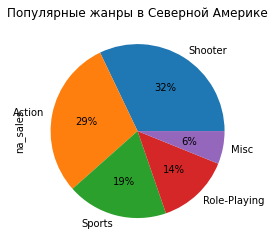

In [60]:
#Построим диаграмму популярности жанров в Северной Америке:
(actual_period
     .pivot_table(index='genre', values='na_sales', aggfunc='sum')
     .sort_values('na_sales', ascending=False).head(5)
     .plot(kind='pie', y='na_sales', autopct='%1.0f%%', legend=False, title='Популярные жанры в Северной Америке')
)
pass

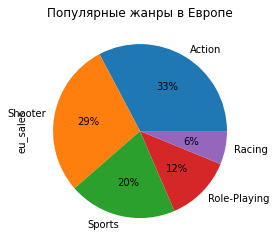

In [61]:
#Построим диаграмму популярных жанров в Европе:
(actual_period
     .pivot_table(index='genre', values='eu_sales', aggfunc='sum')
     .sort_values('eu_sales', ascending=False).head(5)
     .plot(kind='pie', y='eu_sales', autopct='%1.0f%%', legend=False, title='Популярные жанры в Европе')
)
pass

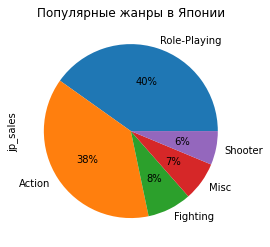

In [62]:
#Построим диаграмму популярных жанров в Японии:
(actual_period
     .pivot_table(index='genre', values='jp_sales', aggfunc='sum')
     .sort_values('jp_sales', ascending=False).head(5)
     .plot(kind='pie', y='jp_sales', autopct='%1.0f%%', legend=False, title='Популярные жанры в Японии')
)
pass

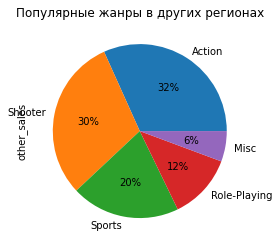

In [64]:
#Построим диаграмму популярных жанров в других регионах:
(actual_period
     .pivot_table(index='genre', values='other_sales', aggfunc='sum')
     .sort_values('other_sales', ascending=False).head(5)
     .plot(kind='pie', y='other_sales', autopct='%1.0f%%', legend=False, title='Популярные жанры в других регионах')
)
pass

**Распределение жанров в Европе, Америке и дургих регинах примерно похоже, топ-3 лидера - action, shooter, sports. Что касается Японии, наибольшую долю составляют role-playing игры**

Проверим, влияет ли рейтинг ESRB на продажи в отдельном регионе

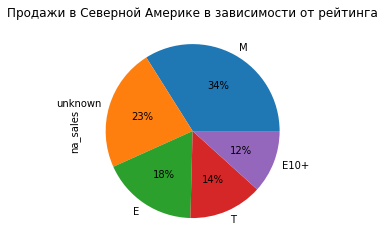

In [65]:
#Продажи в Северной Америке в зависимости от рейтига:
(actual_period
     .pivot_table(index='rating', values='na_sales', aggfunc='sum')
     .sort_values('na_sales', ascending=False)
     .plot(kind='pie', y='na_sales', autopct='%1.0f%%', legend=False, title='Продажи в Северной Америке в зависимости от рейтинга')
)
pass

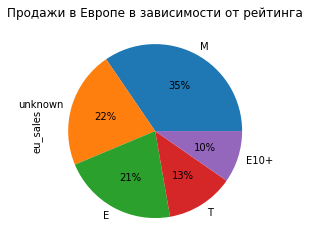

In [66]:
#Продажи в Европе:
(actual_period
     .pivot_table(index='rating', values='eu_sales', aggfunc='sum')
     .sort_values('eu_sales', ascending=False)
     .plot(kind='pie', y='eu_sales', autopct='%1.0f%%', legend=False, title='Продажи в Европе в зависимости от рейтинга')
)
pass

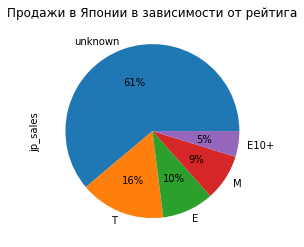

In [67]:
#продажи в Японии:
(actual_period
     .pivot_table(index='rating', values='jp_sales', aggfunc='sum')
     .sort_values('jp_sales', ascending=False)
     .plot(kind='pie', y='jp_sales', autopct='%1.0f%%', legend=False, title='Продажи в Японии в зависимости от рейтига')
)
pass

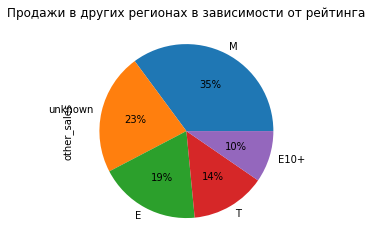

In [68]:
#Продажи в других регионах:
(actual_period
     .pivot_table(index='rating', values='other_sales', aggfunc='sum')
     .sort_values('other_sales', ascending=False)
     .plot(kind='pie', y='other_sales', autopct='%1.0f%%', legend=False, title='Продажи в других регионах в зависимости от рейтинга')
)
pass

Во всех регионах много игр с неизвестным рейтингом

В топе у Америки, Европы и других регионов - игры для взрослых, для всех и с неизвестным рейтингом


Лидеры в Японии - игры для подростков, для всех и с неизвестным рейтингом


**Итак, портреты пользователей:**

**Америка, Европа, другие регионы: выбирают PS4/XOne, играют преимущественно в игры жанров action, shooter, sports и рейтингом для взрослых/для всех/с неизвестным рейтингом**

**Япония: используют 3DS, играют преимущественно в игры жанров action и role-playing и рейтингом для подростков/для всех/неизвестным рейтингом**

Оценим объем продаж по регионам:

In [69]:
print('Америка:', popular_platform['na_sales'].sum())
print('Европа:', popular_platform['eu_sales'].sum())
print('Япония:', popular_platform['jp_sales'].sum())

Америка: 284.06000000000006
Европа: 270.67999999999995
Япония: 93.09


**Видим, что из трех стран Япония составляет самую маленькую долю продаж**

## Проверка Гипотез

H0: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

H1: Средние пользовательские рейтинги платформ Xbox One и PC отличаются

In [70]:
xone = actual_period.query('platform == "XOne" and user_score != -1')
ps = actual_period.query('platform == "PC" and user_score != -1')

In [71]:
print("Дисперсия выборки xone:",np.var(xone['user_score']))
print("Дисперсия выборки pc:",np.var(ps['user_score']))

Дисперсия выборки xone: 1.8795460055096425
Дисперсия выборки pc: 2.8773743617307175


In [72]:
alpha = .05
results = st.ttest_ind(xone['user_score'], ps['user_score'], equal_var=False)
print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")
    
print(xone['user_score'].mean())
print(ps['user_score'].mean())

p-значение: 0.11601398086668832
Не получилось отвергнуть нулевую гипотезу
6.594545454545456
6.298360655737705


**Гипотеза о том, что средние пользовательские рейтинги платформ Xbox One и PC одинаковые подтвердилась**


H0: Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») одинаковые

H1: Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные

In [73]:
action = actual_period.query('genre == "Action" and user_score != -1')
sports = actual_period.query('genre == "Sports" and user_score != -1')

In [74]:
print("Дисперсия выборки xone:",np.var(action['user_score']))
print("Дисперсия выборки pc:",np.var(sports['user_score']))

Дисперсия выборки xone: 1.89208448117539
Дисперсия выборки pc: 3.4198375596751185


In [75]:
alpha = .05

results = st.ttest_ind(action['user_score'], sports['user_score'], equal_var=False)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")
    
print(action['user_score'].mean())
print(sports['user_score'].mean())

p-значение: 1.1825550382644557e-14
Отвергаем нулевую гипотезу
6.760606060606061
5.2251968503937


**Гипотеза о том, что средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные подтвердилась**

В качестве нулевых гипотез я выбирала предположения, указывающие на отсутствие различий между выборками (то есть то, что пользовательские рейтинги равны). Альтернативные гипотезы - те, которые охватывают остальные возможные события, не входящие в нулевую гипотезу (то, что пользовательские рейтинги не равны).

Альфа я выбрала 0,05 исходя из того, что именно такой уровень проверки гипотезы чаще всего применяют в маркетинге. Неправильные выводы, сделанные в результате проверки данных гипотез, не влекут за собой серьезных последствий и большого риска, поэтому выбирать значение менее 0,05 нет смысла

## Общий вывод:

1. Пик выпуска игр пришелся на 2007-2008 годы, затем наблюдался резкий спад
2. Платформы-лидеры по продажам за все время: PS2, X360, PS3, Wii, DS, PS
3. Жизненный цикл платформы составляет примерно 10 лет
4. Лидеры по продажам за 2014-2016 год - PS4 и XOne
5. Платформы лидеры в Европе и Америке - PS4, XOne, в Японии - 3DS
6. Жанры, приносящие стабильную прибыль - Shooter, Sports
7. В Европе и Америке играют чаще всего в Action и Shooter, в Японии - Action и Role-Playing
8. Чаще всего покупают игры категории возраста "для всех"
9. Рынок Японии имеет самую маленькую долю продаж
 
 
 **Итак, исходя из исследования, можно сделать вывод, что нужно работать на европейский и американский рынок. Выгоднее всего разрабатывать игру для PS4, XOne в жанре Shooter**